<a href="https://colab.research.google.com/github/gerogeykp/Data-Science/blob/main/used_car_price_prediction_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [9]:
pwd


'/content'

In [10]:
df = pd.read_csv("car_dataset.csv")
pd.set_option("display.max_columns", None)

# Data Preparation

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.shape

(301, 9)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


## Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [14]:
df.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
df1 = df.drop("Car_Name", axis=1)
df1 = pd.get_dummies(df1,drop_first = True)

In [16]:
df1[["Kms_Driven","Year"]].sample(10)

,Kms_Driven,Year
286,28569,2016
243,7000,2016
56,40534,2015
161,23000,2014
119,5400,2013
263,16002,2016
266,35000,2014
251,56701,2013
259,36054,2014
277,21780,2015


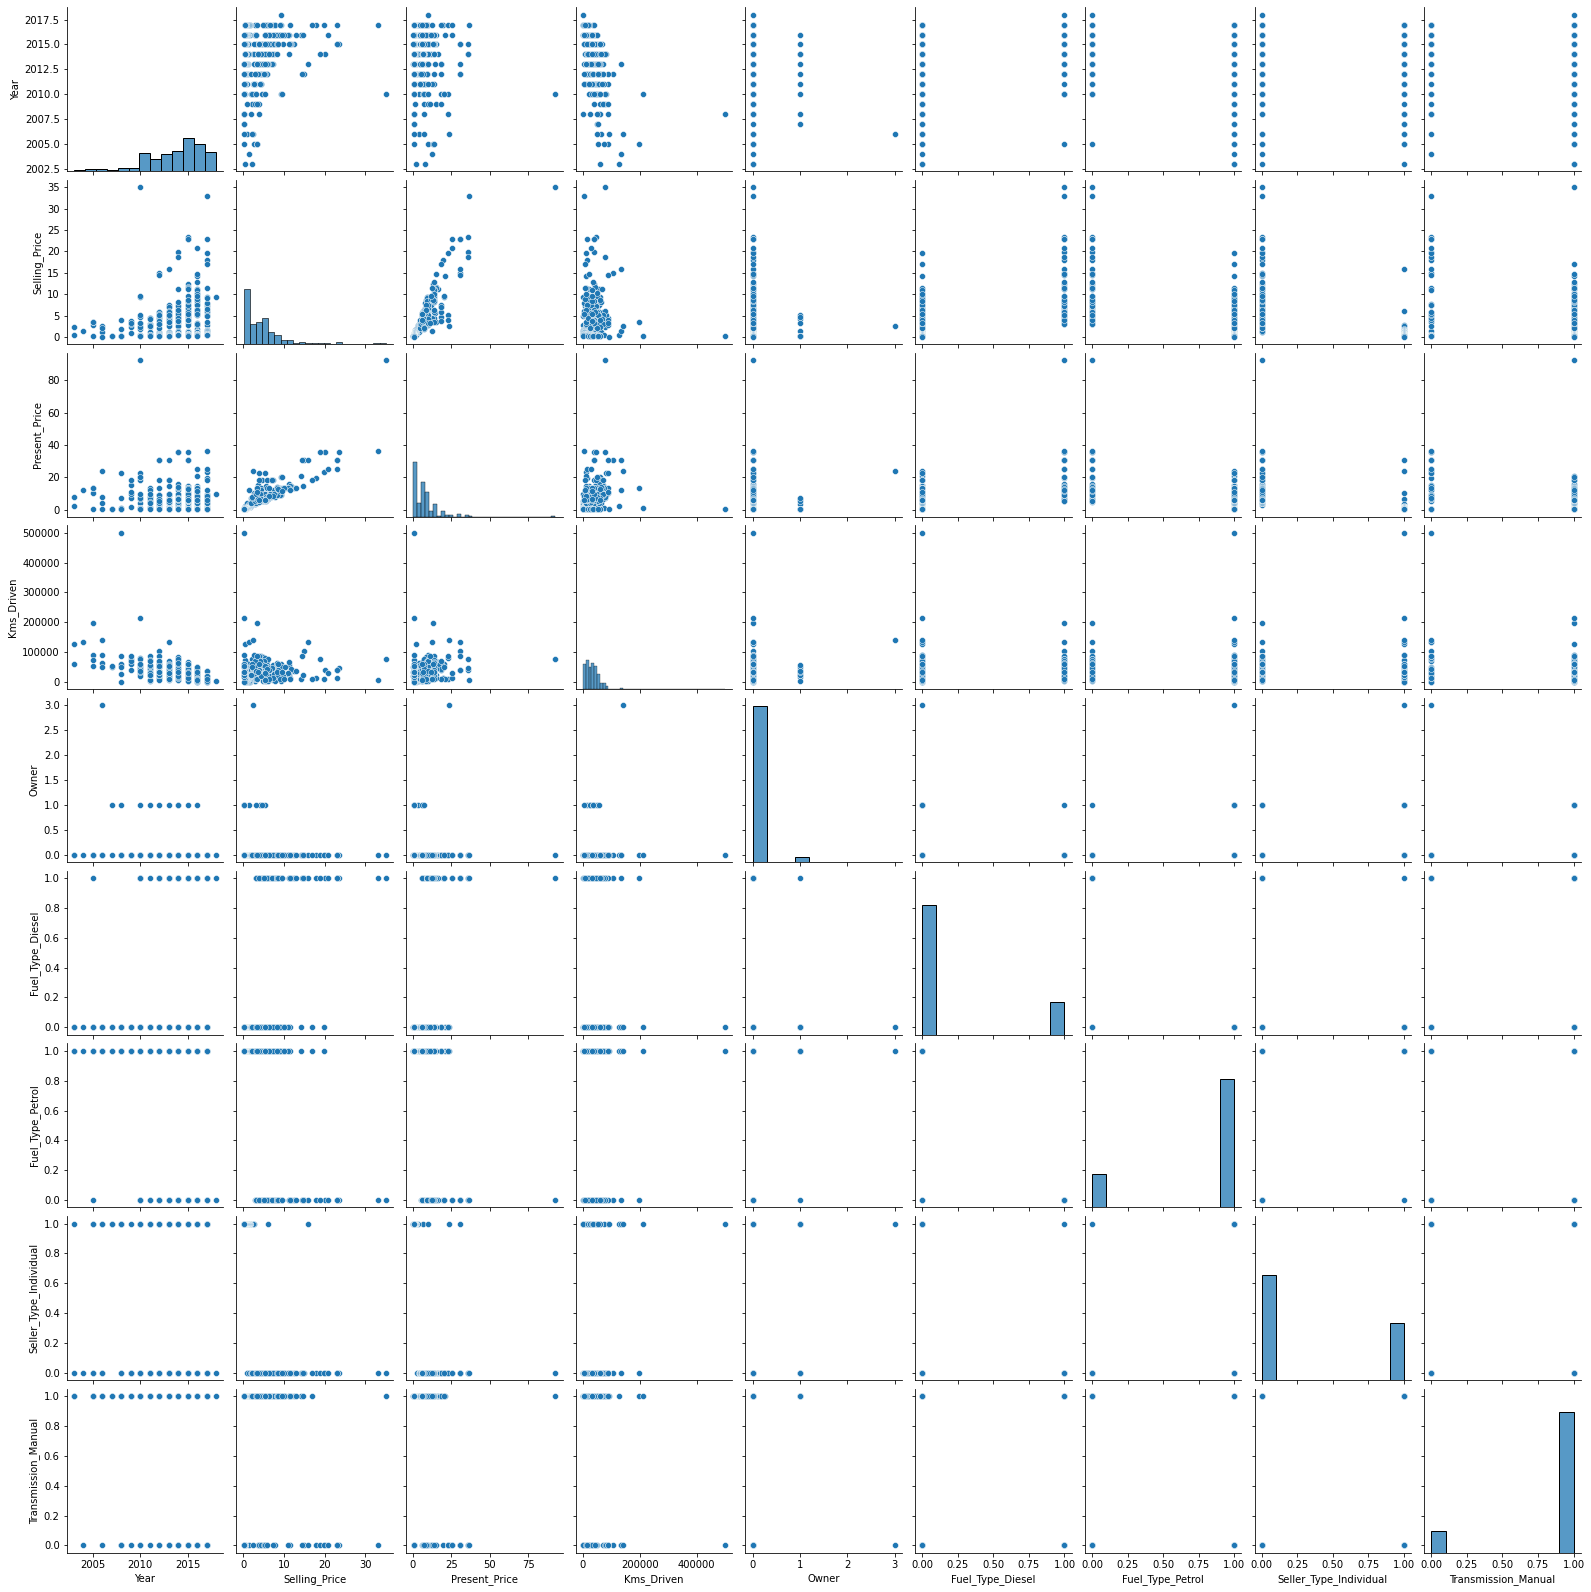

In [17]:
sns.pairplot(df1)

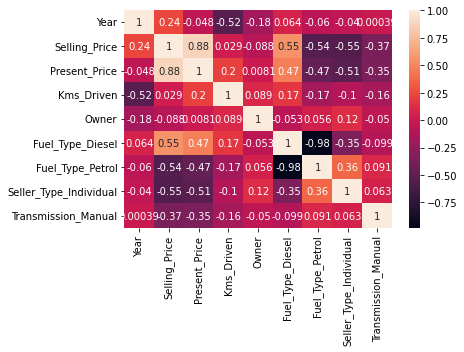

In [18]:
sns.heatmap(df1.corr(), annot =True)

### Splitting data into training and testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df1.drop(columns="Selling_Price")
y = df1.Selling_Price

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [22]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## ALL LIBRARY

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate

from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

##  Model Building (Linear Regression)

In [24]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)


print("Train Results")
print('rmse:', np.sqrt(mean_squared_error(y_train, lin_model.predict(X_train))))
print('r2: ', r2_score(y_train, lin_model.predict(X_train)))
print()
print("Test Results")
print('rmse:', np.sqrt(mean_squared_error(y_test, lin_model.predict(X_test))))
print('r2: ', r2_score(y_test, lin_model.predict(X_test)))

Train Results
rmse: 1.7157274084081588
r2:  0.8886517300804573

Test Results
rmse: 1.8651552135522913
r2:  0.8489813024897594


# Interpret the model

In [25]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}


In [26]:
comparing=pd.DataFrame(my_dict)
comparing


,Actual,Pred,Residual
177,0.35,2.955343,-2.605343
289,10.11,8.178939,1.931061
228,4.95,6.454273,-1.504273
198,0.15,-1.424175,1.574175
60,6.95,9.088899,-2.138899
...,...,...,...
234,5.50,4.474781,1.025219
296,9.50,8.973776,0.526224
281,2.10,1.822946,0.277054
285,7.40,7.604167,-0.204167


In [27]:
result_sample = comparing.head(25)

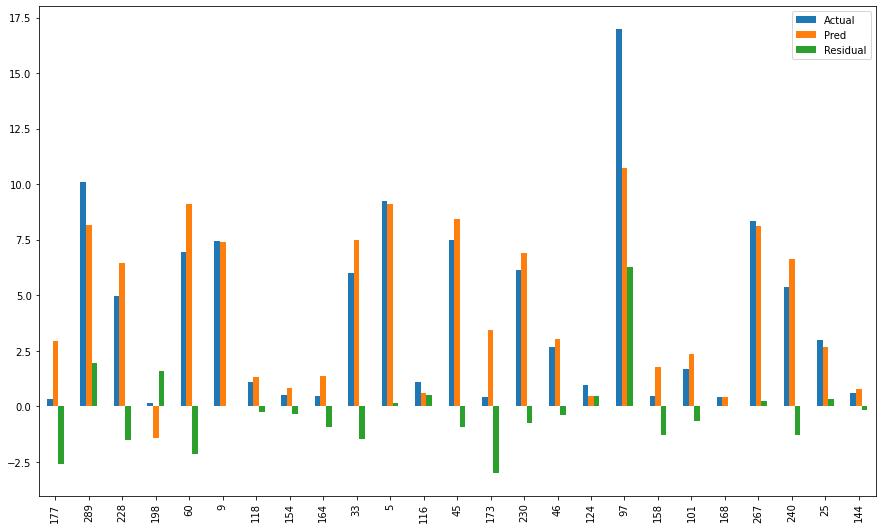

In [28]:
result_sample.plot.bar(figsize=(15,9))
plt.show()


# Model Evaluation

In [29]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")


In [30]:
eval_metrics(y_test, y_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8489813024897594
MAE 		: 1.2162256821298496
MSE 		: 3.478803970641293
RMSE 		: 1.8651552135522913


In [31]:
y_train_pred = lin_model.predict(X_train)


In [32]:
eval_metrics(y_train, y_train_pred)


Model testing performance:
--------------------------
R2_score 	: 0.8886517300804573
MAE 		: 1.1675804448346956
MSE 		: 2.9437205399629773
RMSE 		: 1.7157274084081588


In [33]:
model_scores = {"model_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "model_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ls =pd.DataFrame(model_scores)
ls


,model_train,model_test
rmse,1.715727,1.865155
mae,1.167580,1.216226
mse,2.943721,3.478804
R2,0.888652,0.848981


# Regularization

# Ridge

In [34]:
ridge_model = Ridge(alpha=1)

In [35]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [36]:
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131454
MAE 		: 1.2114288537900089
MSE 		: 3.452756236425511
RMSE 		: 1.858159367876047


In [37]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8884015131437724
MAE 		: 1.1686771305018673
MSE 		: 2.950335539338347
RMSE 		: 1.7176540802322064


In [38]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,1.717654,1.858159
mae,1.168677,1.211429
mse,2.950336,3.452756
R2,0.888402,0.850112


In [39]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [40]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.900347,-1.451873,-4.179716,-2.044435
2,0.654007,-1.500285,-5.782670,-2.404718
3,0.818225,-1.681365,-11.109517,-3.333094
4,0.834832,-1.091568,-2.087149,-1.444697
5,0.803887,-1.272124,-4.094203,-2.023414
6,0.805688,-0.859961,-1.009681,-1.004829
7,0.859226,-1.326651,-7.323181,-2.706138
8,0.426320,-1.195132,-3.267166,-1.807530
9,0.899870,-1.263281,-2.796771,-1.672355
10,0.870952,-0.887696,-1.202186,-1.096442


In [41]:
pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:].mean()

test_r2                             0.787335
test_neg_mean_absolute_error       -1.252994
test_neg_mean_squared_error        -4.285224
test_neg_root_mean_squared_error   -1.953765
dtype: float64

In [42]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131454
MAE 		: 1.2114288537900089
MSE 		: 3.452756236425511
RMSE 		: 1.858159367876047


In [43]:
alpha_space = np.linspace(0.01, 1, 100)  # bu aralığı azaltıp arttırabilirsin. 
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [44]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [45]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_root_mean_squared_error', store_cv_values=False)

In [46]:
ridge_cv_model.alpha_

1.0

In [47]:
y_pred = ridge_cv_model.predict(X_test)

In [48]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8501120632131454
MAE 		: 1.2114288537900089
MSE 		: 3.452756236425511
RMSE 		: 1.858159367876047


In [49]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred) 

Model testing performance:
--------------------------
R2_score 	: 0.8884015131437724
MAE 		: 1.1686771305018673
MSE 		: 2.950335539338347
RMSE 		: 1.7176540802322064


In [50]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,1.717654,1.858159
mae,1.168677,1.211429
mse,2.950336,3.452756
R2,0.888402,0.850112


# Lasso

In [51]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [52]:
y_train_pred = lasso_model.predict(X_train)

In [53]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.848030286813716
MAE 		: 1.2231110358007187
MSE 		: 4.017631944187324
RMSE 		: 2.004403139138263


In [54]:
y_pred = lasso_model.predict(X_test)

In [55]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.798551246128469
MAE 		: 1.471428863669146
MSE 		: 4.6404897963148
RMSE 		: 2.1541796109690576


In [56]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2.004403,2.154180
mae,1.223111,1.471429
mse,4.017632,4.640490
R2,0.848030,0.798551


In [57]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551


In [58]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [59]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.883049,-1.435615,-4.905248,-2.214779
2,0.696743,-1.416323,-5.068414,-2.251314
3,0.725062,-1.911275,-16.803328,-4.099186
4,0.843876,-1.044645,-1.972867,-1.404588
5,0.736887,-1.464262,-5.492953,-2.343705
6,0.817708,-0.725413,-0.947220,-0.973252
7,0.813136,-1.597788,-9.720810,-3.117821
8,0.563139,-0.931708,-2.487967,-1.577329
9,0.834202,-1.482811,-4.630980,-2.151971
10,0.873459,-0.893706,-1.178830,-1.085739


In [60]:
lasso_model.coef_

array([ 2.83120931e-01,  5.05717082e-01, -6.02109175e-06, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [61]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000) 

In [62]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67....7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [63]:
lasso_cv_model.alpha_

0.01

In [64]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8883375747201654
MAE 		: 1.1644092016211973
MSE 		: 2.9520258830769652
RMSE 		: 1.7181460598787768


In [65]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917908564931
MAE 		: 1.2076443420406593
MSE 		: 3.437098312846395
RMSE 		: 1.8539412916396234


In [66]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,1.718146,1.853941
mae,1.164409,1.207644
mse,2.952026,3.437098
R2,0.888338,0.850792


In [67]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180,1.718146,1.853941
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429,1.164409,1.207644
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490,2.952026,3.437098
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551,0.888338,0.850792


## Elastic-Net 

In [68]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
elastic_model.l1_ratio

0.5

In [70]:
elastic_model.alpha

1.0

In [71]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8515542497169762
MAE 		: 1.2191411121564875
MSE 		: 3.924468736641389
RMSE 		: 1.9810271923023643


In [72]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8087874396439665
MAE 		: 1.4234287536004082
MSE 		: 4.404693095422508
RMSE 		: 2.098736070929956


In [73]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,1.981027,2.098736
mae,1.219141,1.423429
mse,3.924469,4.404693
R2,0.851554,0.808787


In [74]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180,1.718146,1.853941,1.981027,2.098736
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429,1.164409,1.207644,1.219141,1.423429
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490,2.952026,3.437098,3.924469,4.404693
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551,0.888338,0.850792,0.851554,0.808787


In [75]:
elastic_model.coef_

array([ 3.36735713e-01,  5.07832721e-01, -4.21808778e-06, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [76]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [77]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbo

In [78]:
elastic_cv_model.alpha_

0.01

In [79]:
elastic_cv_model.l1_ratio_

0.1

In [80]:
elastic_cv_model.coef_

array([ 3.61098933e-01,  4.35282527e-01, -5.77786608e-06, -7.90429588e-01,
        1.34743816e+00, -3.51942317e-01, -1.10663428e+00, -1.46915499e+00])

In [81]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8880761796379942
MAE 		: 1.165710329582485
MSE 		: 2.9589363997198257
RMSE 		: 1.7201559230836678


In [82]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8511003814665743
MAE 		: 1.206497770003033
MSE 		: 3.429989747765704
RMSE 		: 1.8520231499000503


In [83]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,1.720156,1.852023
mae,1.165710,1.206498
mse,2.958936,3.429990
R2,0.888076,0.851100


In [84]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,model_train,model_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,1.715727,1.865155,1.717654,1.858159,1.717654,1.858159,2.004403,2.154180,1.718146,1.853941,1.981027,2.098736,1.720156,1.852023
mae,1.167580,1.216226,1.168677,1.211429,1.168677,1.211429,1.223111,1.471429,1.164409,1.207644,1.219141,1.423429,1.165710,1.206498
mse,2.943721,3.478804,2.950336,3.452756,2.950336,3.452756,4.017632,4.640490,2.952026,3.437098,3.924469,4.404693,2.958936,3.429990
R2,0.888652,0.848981,0.888402,0.850112,0.888402,0.850112,0.848030,0.798551,0.888338,0.850792,0.851554,0.808787,0.888076,0.851100


In [85]:
yüzde 10 lasso yüzde 90 ridge... Elastic model. 

SyntaxError: ignored